In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras

# Load CIFAR-10 Dataset

In [ ]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/6)


print("Training:", x_train.shape,y_train.shape)
print("Validation:", x_val.shape,y_val.shape)
print("Test:", x_test.shape,y_test.shape)



# y_train = np.eye(10)[y_train]
# y_val = np.eye(10)[y_val]
# y_test = np.eye(10)[y_test]

170498071/170498071 [==============================] - 4s 0us/step
Training: (41666, 32, 32, 3) (41666, 1)
Validation: (8334, 32, 32, 3) (8334, 1)
Test: (10000, 32, 32, 3) (10000, 1)


# Show sample CIFAR-10 Images

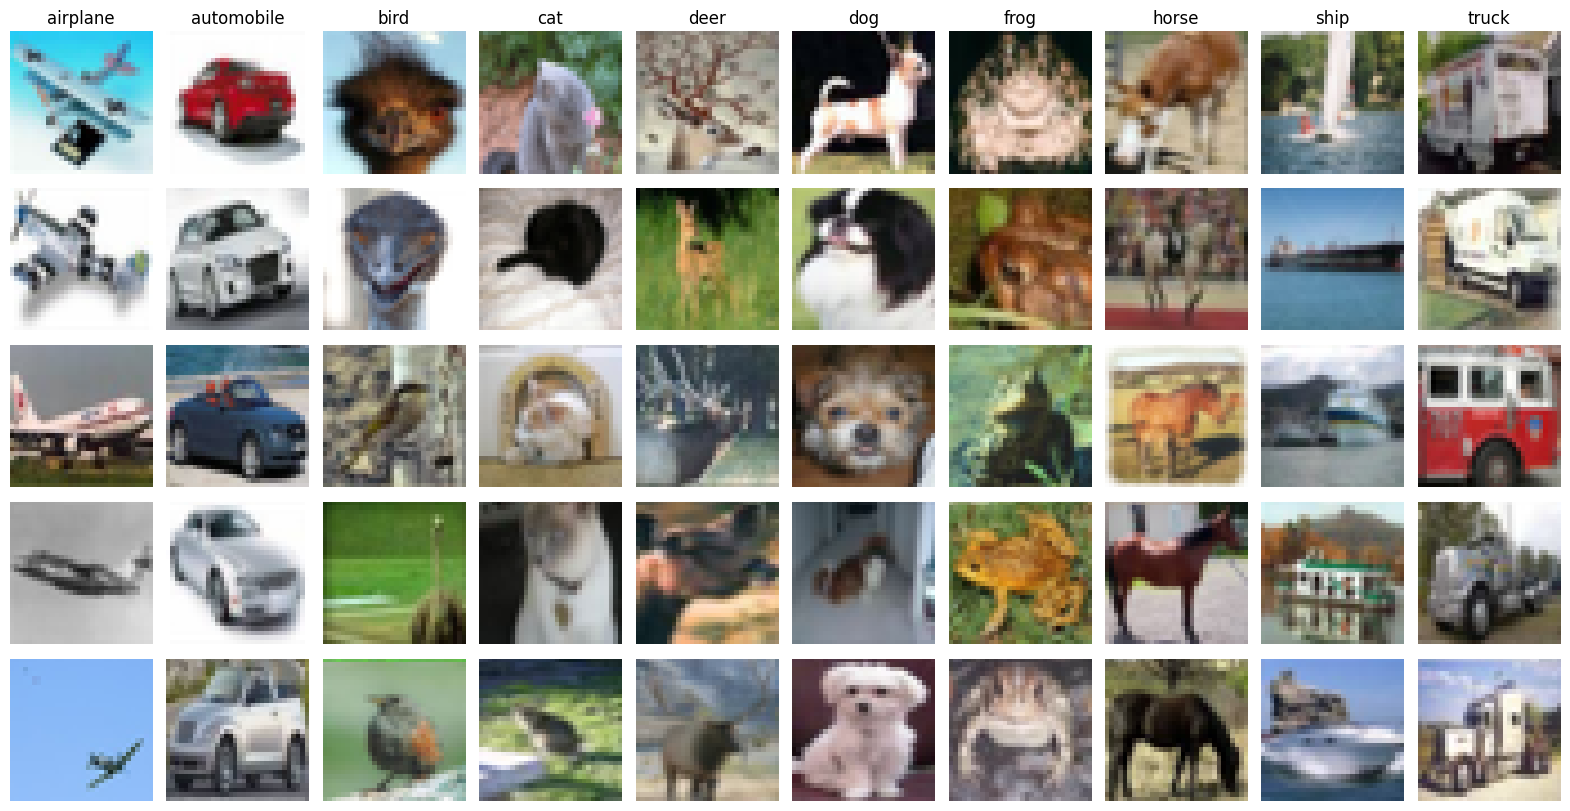

In [ ]:
# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Initialize a figure
fig, axarr = plt.subplots(5, 10, figsize=(20, 10))

# Iterate through each class
for class_index in range(10):
    # Find the indices of images with the current class
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 5 samples
    random_indices = np.random.choice(class_indices, size=5, replace=False)
    # Plot each sample in a column
    for i, idx in enumerate(random_indices):
        axarr[i, class_index].imshow(x_train[idx])
        if i==0: axarr[i, class_index].set_title(class_names[class_index])
        axarr[i, class_index].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Load Different Layers and Create the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Rescaling, Dense
from keras.layers import Conv2D, MaxPooling2D

# Create a Sequential model
model = Sequential()

# Add a layer to normlize the data
model.add(Rescaling(scale=1.0/255, offset=0.0))


# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of Convolutional layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes


# Compiling the Model

In [ ]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy # equivalent to "categorical_crossentropy" without requiring one-hot encoded labels
# from keras.metrics import CategroicalAccuracy

model.compile(optimizer=Adam(learning_rate=0.001),loss=sparse_categorical_crossentropy,metrics=["accuracy"])


# Train the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_val,y_val))

Epoch 1/50
326/326 [==============================] - 9s 13ms/step - loss: 1.4774 - accuracy: 0.4641 - val_loss: 1.1789 - val_accuracy: 0.5848
Epoch 2/50
326/326 [==============================] - 3s 10ms/step - loss: 1.0396 - accuracy: 0.6334 - val_loss: 1.0030 - val_accuracy: 0.6574
Epoch 3/50
326/326 [==============================] - 4s 11ms/step - loss: 0.8511 - accuracy: 0.7052 - val_loss: 0.8593 - val_accuracy: 0.7045
Epoch 4/50
326/326 [==============================] - 3s 10ms/step - loss: 0.7234 - accuracy: 0.7487 - val_loss: 0.8195 - val_accuracy: 0.7142
Epoch 5/50
326/326 [==============================] - 3s 10ms/step - loss: 0.6048 - accuracy: 0.7903 - val_loss: 0.7804 - val_accuracy: 0.7334
Epoch 6/50
326/326 [==============================] - 3s 11ms/step - loss: 0.5064 - accuracy: 0.8254 - val_loss: 0.7516 - val_accuracy: 0.7475
Epoch 7/50
326/326 [==============================] - 4s 11ms/step - loss: 0.4008 - accuracy: 0.8614 - val_loss: 0.8507 - val_accuracy: 0.7351

# Plot Learning Curve

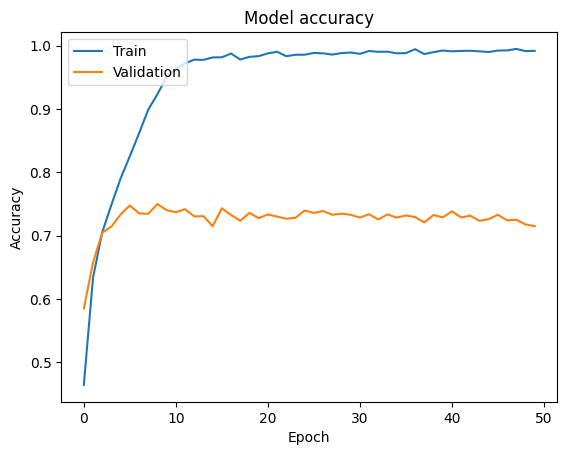

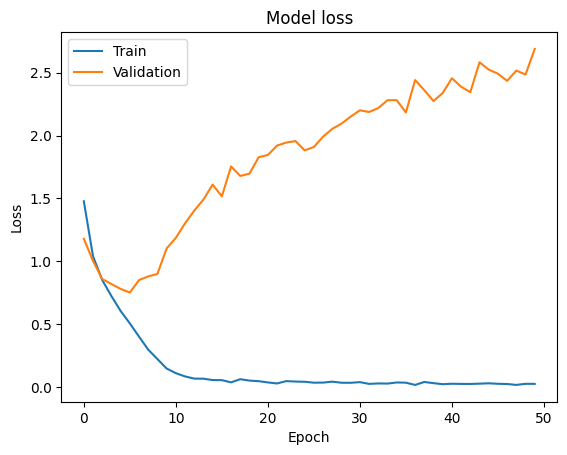

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluating the model

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.7450 - accuracy: 0.7137
Test Loss: 2.7449827194213867
Test Accuracy: 0.713699996471405


# further evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.95      0.71      0.81      1000
           2       0.62      0.60      0.61      1000
           3       0.49      0.59      0.53      1000
           4       0.65      0.74      0.69      1000
           5       0.64      0.59      0.61      1000
           6       0.78      0.78      0.78      1000
           7       0.79      0.78      0.78      1000
           8       0.79      0.84      0.81      1000
           9       0.77      0.82      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000

[[680   2  99  44  26  14  13   9  75  38]
 [ 31 711  12  25  10   2  16   5  60 128]
 [ 37   1 604  99 103  48  46  41  11  10]
 [ 18   4  67 587  69 138  63  33   9  12]
 [ 13   1  42 

# saving model

In [ ]:
# model.save('CIFAR10_Model.keras') #saving model to a .h5 file

#loading previously saved model (if necessary)

In [ ]:
# from keras.models import load_model
# model = load_model('CIFAR10_Model.keras') #load model from a .keras file